In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [3]:
diamonds = pd.read_csv('https://raw.githubusercontent.com/hadley/ggplot2/master/data-raw/diamonds.csv')

In [4]:
flights = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [5]:
tips = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [23]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
flights = flights.pivot('month','year','passengers')

In [28]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417


# clustermap

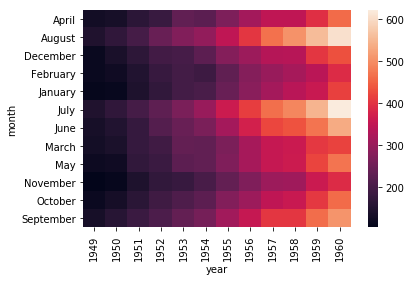

In [29]:
sns.heatmap(flights)

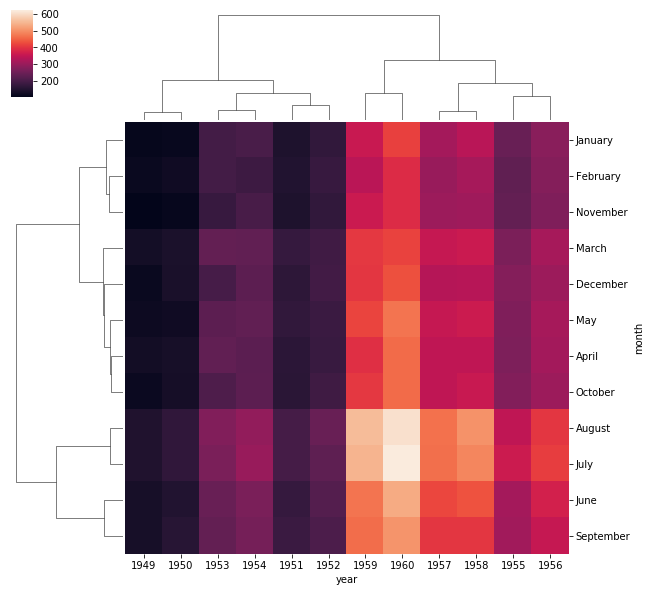

In [30]:
sns.clustermap(flights) #비슷한 데이터끼리 cluster 인듯

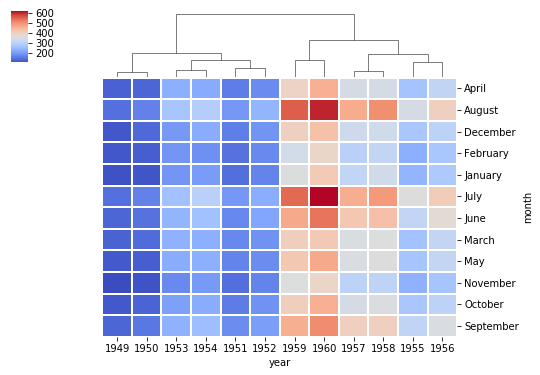

In [40]:
sns.clustermap(flights, row_cluster = False, cmap = 'coolwarm',
              linewidths = 1, figsize = (8,6))
#row나 columns 만 적용 가능
#cmap 으로 색상조절
#linewidths 로 떨어져있는 정도 조절
#figsize 로 전체 크기 조절

In [41]:
# standardize across col or rows

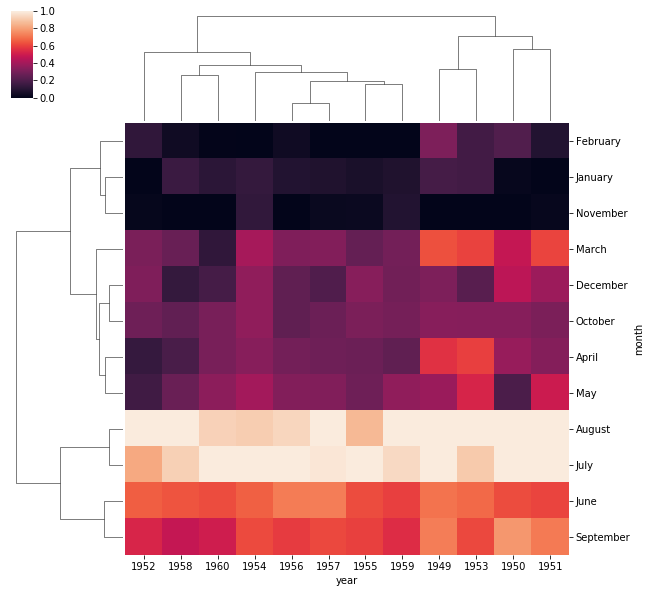

In [42]:
sns.clustermap(flights, standard_scale = 1 )

In [43]:
#nomalizing

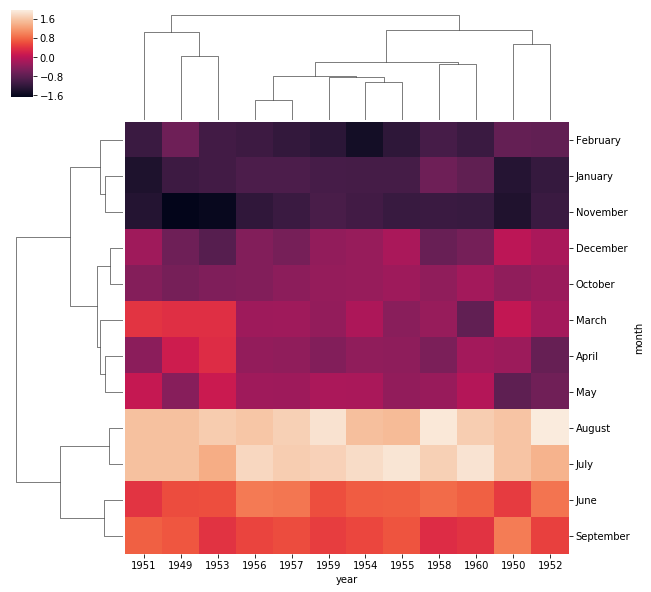

In [44]:
sns.clustermap(flights, z_score = 1)

# heatmap

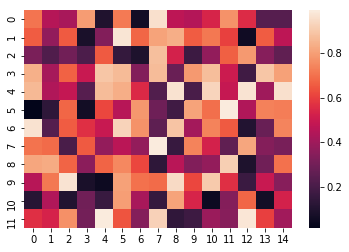

In [5]:
normal = np.random.rand(12,15)

sns.heatmap(normal)

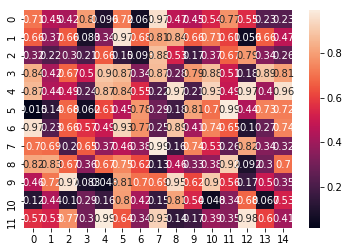

In [7]:
sns.heatmap(normal, annot = True)

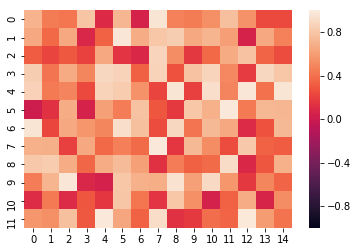

In [12]:
sns.heatmap(normal, vmin = -1, vmax = 1)

In [13]:
flights = flights.pivot('month', 'year', 'passengers')

In [15]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417


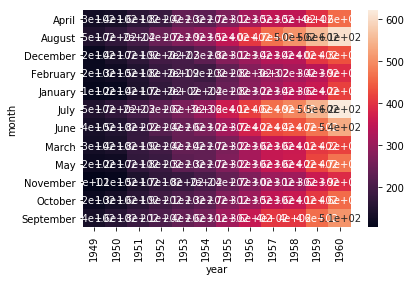

In [17]:
sns.heatmap(flights, annot = True)

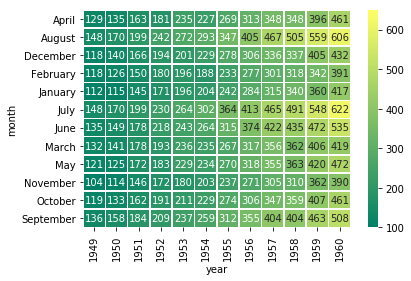

In [24]:
sns.heatmap(flights, annot = True, 
            fmt = 'd', #fmt는 annot쓸때 같이 고고 하면 문제 해결
            linewidths = 0.5, vmin =100, vmax = 650,
            cmap = 'summer' ) #cmap으로 컬러맵조정

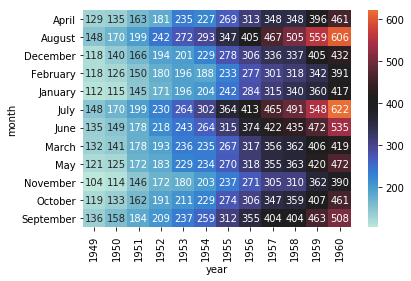

In [31]:
sns.heatmap(flights, center = flights.loc['March',1959],#center를 통해 원하는 애를 기준으로 세움
           annot = True, fmt = 'd')

# FacetGrid

In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


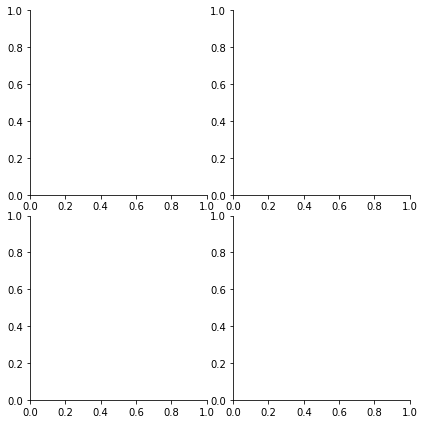

In [35]:
sns.FacetGrid(tips, row = 'smoker', col = 'time')

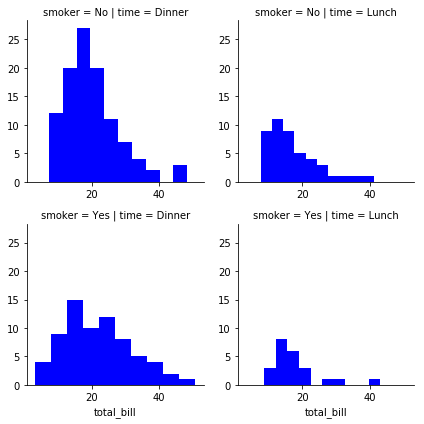

In [39]:
x = sns.FacetGrid(tips, row = 'smoker', col = 'time')
x = x.map(plt.hist, 'total_bill', color = 'blue')

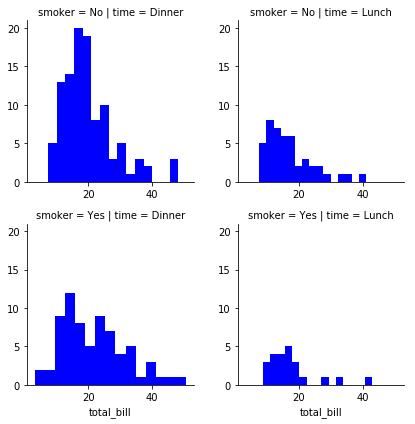

In [40]:
x = sns.FacetGrid(tips, row = 'smoker', col = 'time')
x = x.map(plt.hist, 'total_bill', color = 'blue', bins = 15)

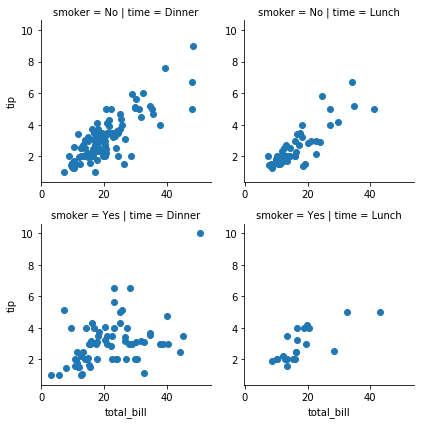

In [42]:
x = sns.FacetGrid(tips, row = 'smoker', col = 'time')
x = x.map(plt.scatter, 'total_bill', 'tip')

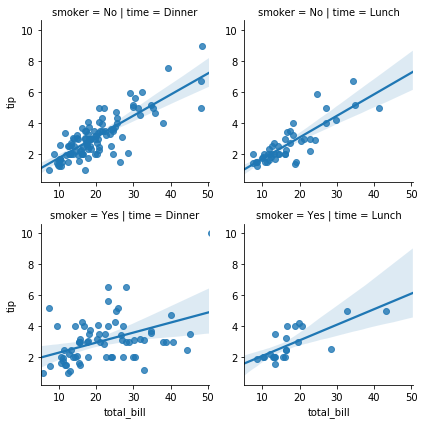

In [43]:
x = sns.FacetGrid(tips, row = 'smoker', col = 'time')
x = x.map(sns.regplot, 'total_bill', 'tip')

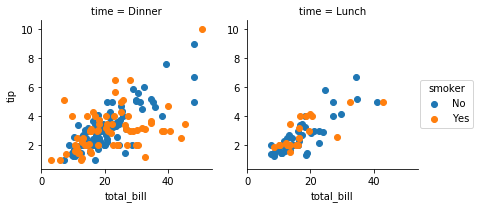

In [45]:
x = sns.FacetGrid(tips, col = 'time', hue = 'smoker')
x = (x.map(plt.scatter, 'total_bill', 'tip')).add_legend()

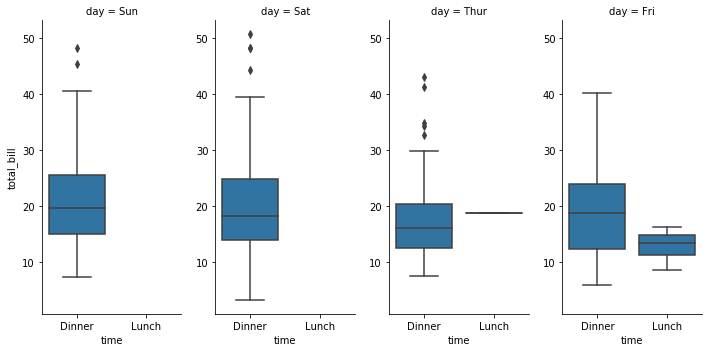

In [54]:
x = sns.FacetGrid(tips, col = 'day', size = 5, aspect = .5)
#size와 aspect로 크기 조절
x = x.map(sns.boxplot, 'time','total_bill')

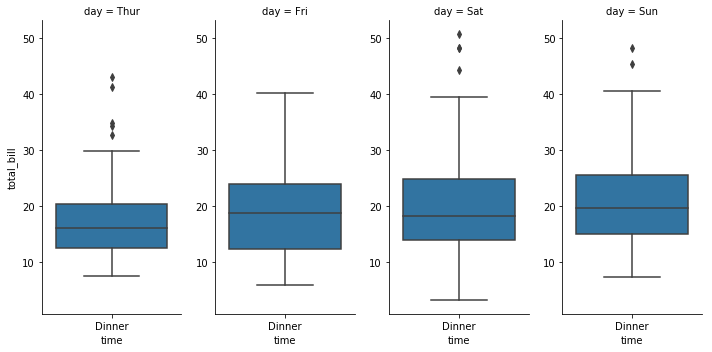

In [60]:
x = sns.FacetGrid(tips, col = 'day', size = 5, aspect = .5,
                 col_order = ['Thur', 'Fri','Sat','Sun'])
x = x.map(sns.boxplot, 'time','total_bill')

# KDE plot

In [6]:
mean = [0,0]
cov = [[0.2,0],[0,3]]

In [7]:
x_axis, y_axis = np.random.multivariate_normal(mean, cov, size=40).T

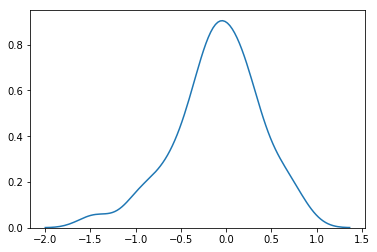

In [8]:
sns.kdeplot(x_axis)

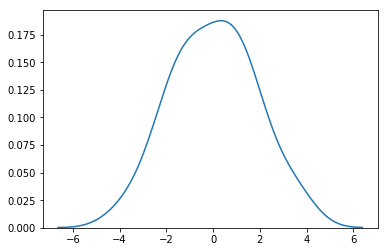

In [11]:
sns.kdeplot(y_axis)

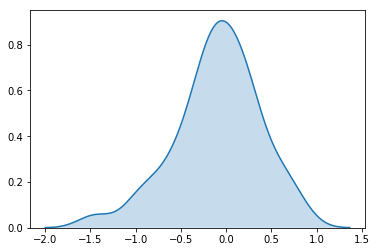

In [13]:
sns.kdeplot(x_axis, shade = True)

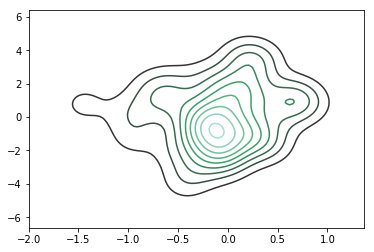

In [16]:
sns.kdeplot(x_axis, y_axis)

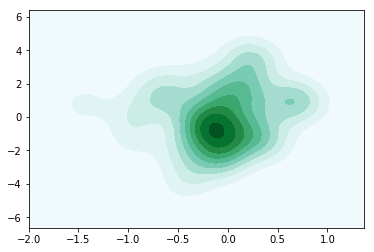

In [17]:
sns.kdeplot(x_axis, y_axis, shade = True)

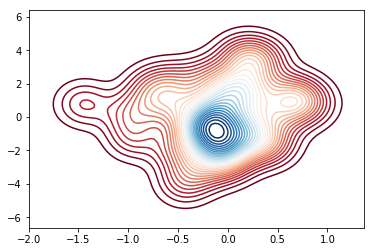

In [19]:
sns.kdeplot(x_axis, y_axis, cmap = 'RdBu',
           n_levels = 35)

In [20]:
setosa = iris.loc[iris.species == 'setosa']
versicolor = iris.loc[iris.species == 'versicolor']

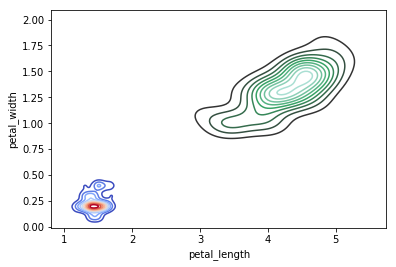

In [25]:
sns.kdeplot(setosa.petal_length, setosa.petal_width, cmap='coolwarm')
sns.kdeplot(versicolor.petal_length, versicolor.petal_width)

# jointplot

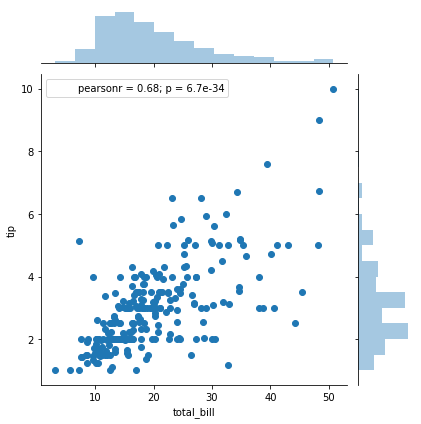

In [6]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

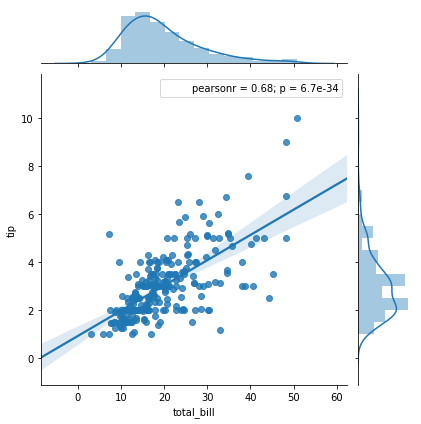

In [8]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, 
              kind = 'reg') #kind 로 조정

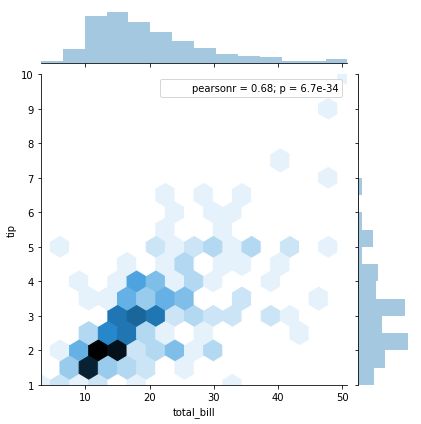

In [9]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, 
              kind = 'hex') #kind 로 조정

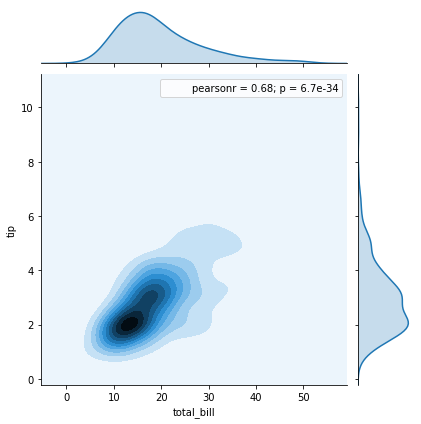

In [10]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips,
             kind = 'kde')

In [11]:
# stat_func 근데 여기 부분은 회귀 에서 배워야 될 듯

In [13]:
!pip install scipy

You are using pip version 9.0.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [16]:
from scipy.stats import spearmanr

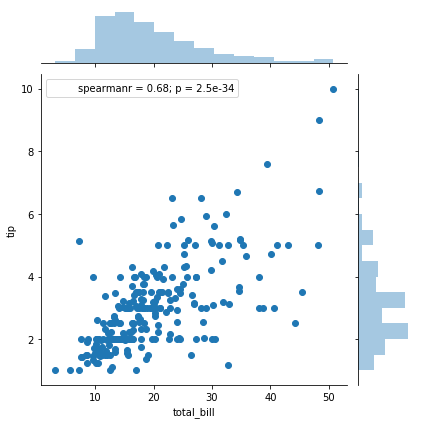

In [18]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips,
             stat_func = spearmanr)

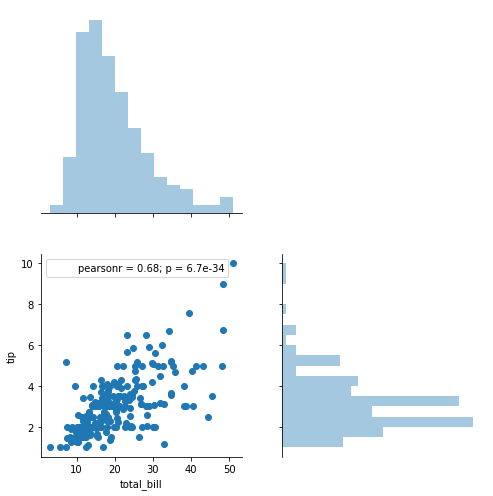

In [23]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, 
              ratio = 1, size = 7) #ratio랑 size로 조인트랑 마지날 조절

# regplot

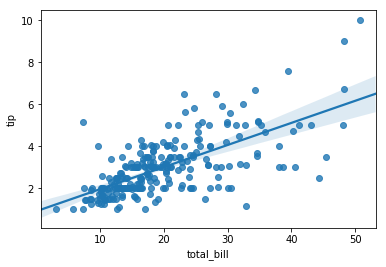

In [26]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)
#데이터를 가장 잘 설명하는 reg 선을 그려줌

In [27]:
mean = [2,5]
cov = [[1.1,0.4],[2.2,3]]

In [28]:
x_val, y_val = np.random.multivariate_normal(mean, cov, 100).T

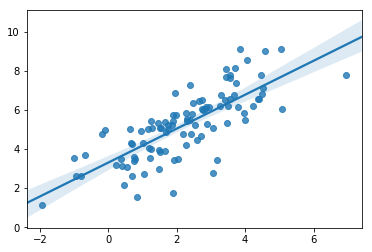

In [32]:
sns.regplot(x = x_val, y =  y_val)

In [34]:
series_x = pd.Series(x_val, name = 'Var_x')
series_y = pd.Series(y_val, name = 'Var_y')

In [36]:
x_val

array([ 3.85442402,  3.79671484,  3.7355449 ,  1.47043451,  3.04878084,
        1.90768532,  0.55923107,  1.88791396,  2.74571091,  3.71977175,
        4.05103654,  1.18962251,  2.7449538 ,  1.76037899,  4.36359242,
        0.77231051,  0.63872773, -0.08819061,  1.88694255,  4.49485965,
        1.25737214,  4.21985573,  3.67778374,  1.14995545,  3.99076287,
        0.74464532,  3.56229003,  2.71782784,  2.46570411,  1.4554423 ,
        2.41483687,  2.60364697,  2.17574595,  5.07414465,  0.66886633,
        1.87618157,  0.4686337 , -1.93182893,  0.41029077,  2.0342826 ,
        2.6491967 ,  3.2626826 ,  1.01969178,  2.54981842,  3.55831797,
        3.45366735,  1.26588474,  3.44025086,  1.04150182,  2.82791507,
        2.76703685,  2.37687066, -0.79770126,  3.96865115,  1.91422603,
        1.20986988,  0.84714845,  2.31681446,  4.41971176,  1.24164939,
        2.26598916,  1.52521199,  5.06320883,  4.58156079,  3.17121751,
        0.96868713,  3.05862166,  2.94364763,  0.2153038 ,  2.45

In [35]:
series_x

0     3.854424
1     3.796715
2     3.735545
3     1.470435
4     3.048781
5     1.907685
6     0.559231
7     1.887914
8     2.745711
9     3.719772
10    4.051037
11    1.189623
12    2.744954
13    1.760379
14    4.363592
15    0.772311
16    0.638728
17   -0.088191
18    1.886943
19    4.494860
20    1.257372
21    4.219856
22    3.677784
23    1.149955
24    3.990763
25    0.744645
26    3.562290
27    2.717828
28    2.465704
29    1.455442
        ...   
70    2.259214
71    3.470602
72    2.889258
73    1.664500
74    4.535105
75    2.859399
76    0.753606
77    1.491274
78   -0.167644
79    6.959386
80    0.702600
81   -0.932117
82    2.386357
83    2.296256
84    1.543223
85    4.473831
86    1.992181
87    0.363853
88    1.660228
89    3.555816
90   -0.991432
91    3.501517
92   -0.686796
93    1.947670
94    1.701567
95    1.507361
96    3.400836
97    0.688099
98    3.293798
99    1.733585
Name: Var_x, Length: 100, dtype: float64

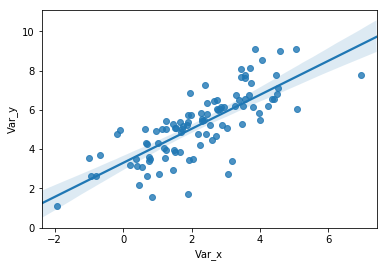

In [37]:
sns.regplot(x = series_x, y =  series_y) #똑같은데 흠..

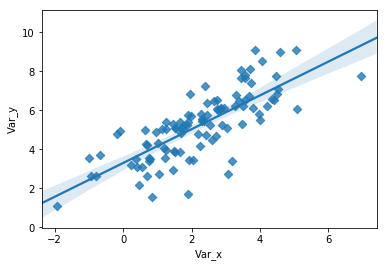

In [38]:
sns.regplot(x = series_x, y =  series_y, marker = 'D')

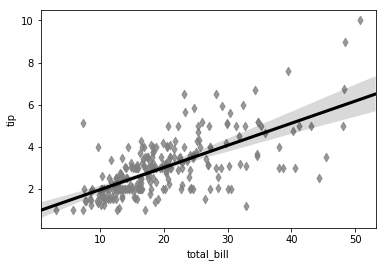

In [47]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips,marker = 'd',
           scatter_kws = {'color' : 'grey'},
           line_kws = {'color' : 'black', 'linewidth' : 3.1})
#따로 따로 적용하고 싶을 때 kws 를 쓰는 듯

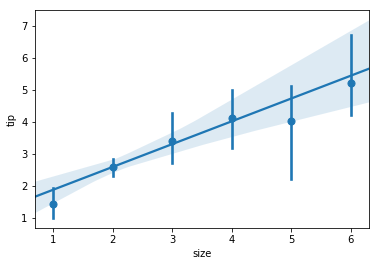

In [51]:
sns.regplot(x = 'size', y = 'tip', data = tips, 
            x_estimator = np.mean, ci = 100)

# pairplot

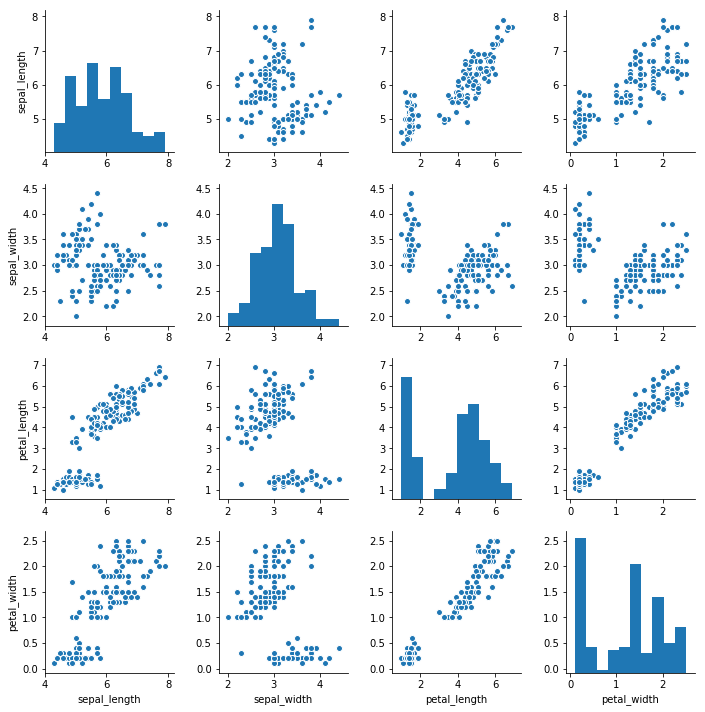

In [52]:
sns.pairplot(iris)

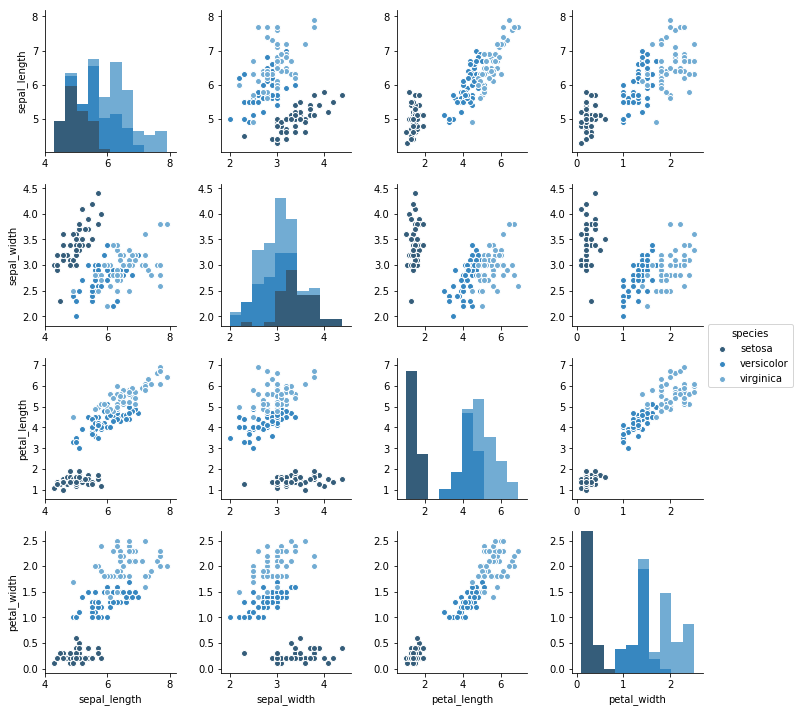

In [55]:
sns.pairplot(iris, hue = 'species', palette = 'Blues_d')

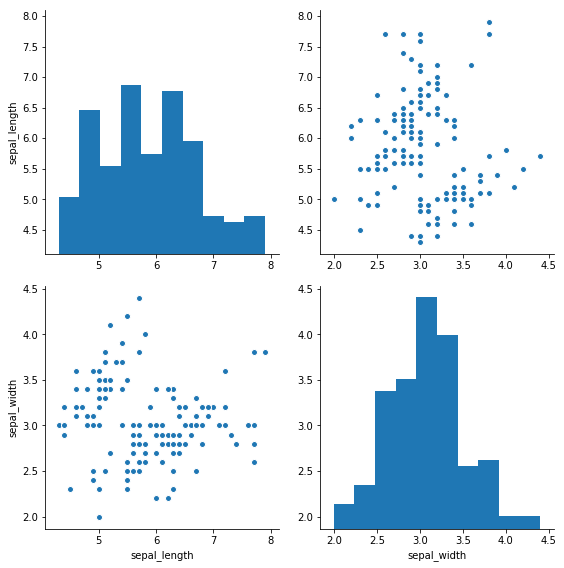

In [58]:
sns.pairplot(iris, 
             vars = ['sepal_length', 'sepal_width'],
             size = 4)
#vars : 원하는 변수만 골라서 실행
#size : 크기 조절

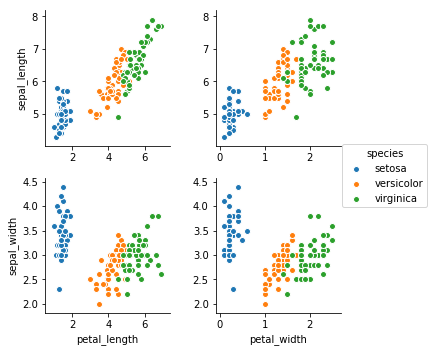

In [60]:
sns.pairplot(iris, x_vars = ['petal_length', 'petal_width'], y_vars = ['sepal_length', 'sepal_width'],
            hue = 'species')

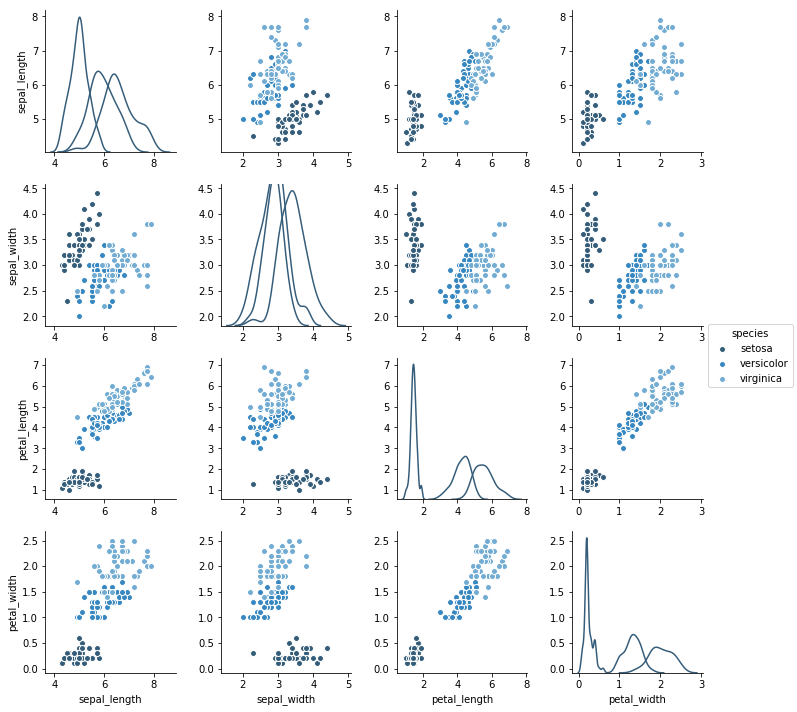

In [61]:
sns.pairplot(iris, hue = 'species', palette = 'Blues_d',
            diag_kind = 'kde')

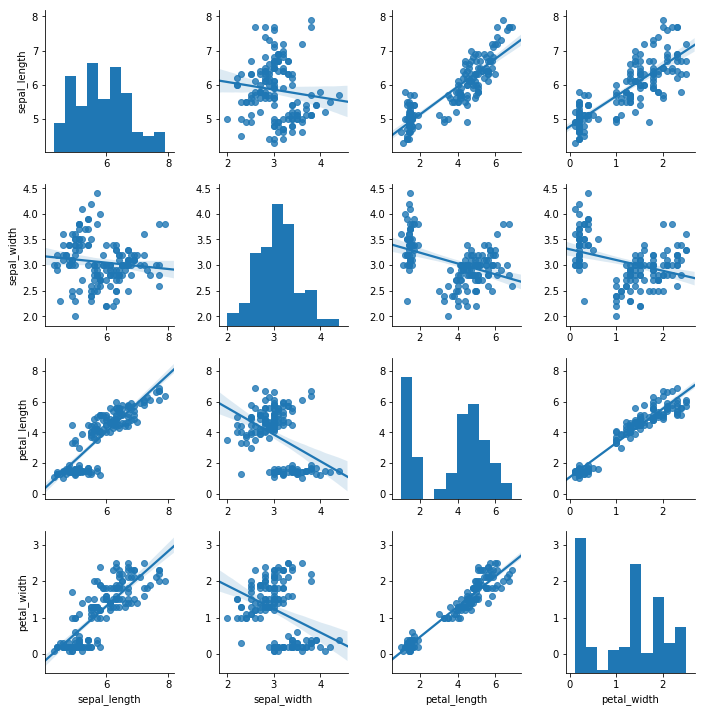

In [62]:
sns.pairplot(iris, kind = 'reg')